In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.cluster import AgglomerativeClustering
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz

In [ ]:
dados = pd.read_csv('TCC.csv',sep=";")
dados.head(5)

,Jogador,Time,Idade,Gols,Assist,xG,xA,PrgC,PrgP,PrgR,TklDef,TklMc,TklAta,Cortes,PassCmp,PassAtt,DistTot,DistPrg,Pos
0,James Tarkowski,Everton,29,0.03,0.03,0.08,0.08,0.34,2.79,0.29,0.95,0.34,0.05,1.34,34.8,43.0,693.7,266.2,Zag
1,Gabriel Dos Santos,Arsenal,24,0.08,0.00,0.13,0.01,0.47,4.04,0.42,0.77,0.40,0.11,0.84,56.9,63.6,1012.0,536.8,Zag
2,Harry Kane,Tottenham,29,0.79,0.08,0.57,0.19,1.59,4.76,5.11,0.03,0.16,0.21,0.05,17.0,24.4,325.3,114.9,Ata
3,Alex Iwobi,Everton,26,0.05,0.19,0.07,0.16,2.40,5.17,3.87,0.99,0.75,0.11,0.67,30.8,41.0,536.1,175.2,Mei
4,Ward-Prowse,Southampton,27,0.24,0.11,0.15,0.17,0.51,5.04,1.55,0.83,0.72,0.19,1.47,45.8,58.0,773.3,232.5,Mei


In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 19 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Jogador  182 non-null    object 
 1   Time     182 non-null    object 
 2   Idade    182 non-null    int64  
 3   Gols     182 non-null    float64
 4   Assist   182 non-null    float64
 5   xG       182 non-null    float64
 6   xA       182 non-null    float64
 7   PrgC     182 non-null    float64
 8   PrgP     182 non-null    float64
 9   PrgR     182 non-null    float64
 10  TklDef   182 non-null    float64
 11  TklMc    182 non-null    float64
 12  TklAta   182 non-null    float64
 13  Cortes   182 non-null    float64
 14  PassCmp  182 non-null    float64
 15  PassAtt  182 non-null    float64
 16  DistTot  182 non-null    float64
 17  DistPrg  182 non-null    float64
 18  Pos      182 non-null    object 
dtypes: float64(15), int64(1), object(3)
memory usage: 27.1+ KB


In [ ]:
x = dados[['PrgC','PrgP','PrgR']]

In [ ]:
#model = AgglomerativeClustering(n_clusters = 5, metric = 'euclidean', linkage = 'ward')

In [ ]:
#y_pred = model.fit_predict(x)

In [ ]:
#fig = plt.figure(figsize=[7,7])
#ax = fig.add_subplot(111, projection="3d")
#ax.scatter(dados['PrgC'],dados['PrgP'],dados['PrgR'], c=y_pred,marker='o',alpha=1)
#plt.show()

In [ ]:
#fig = px.scatter_3d(dados,x='PrgC',y='PrgP',z='PrgR',color=y_pred,opacity=0.85,width=1000,height=800,text=dados['Jogador'])
#fig.show()

In [ ]:
meias = dados['Pos'].isin(['Mei'])
meias.head(5)

0    False
1    False
2    False
3     True
4     True
Name: Pos, dtype: bool

In [ ]:
dados_meias = dados[meias]
dados_meias.head(5)

,Jogador,Time,Idade,Gols,Assist,xG,xA,PrgC,PrgP,PrgR,TklDef,TklMc,TklAta,Cortes,PassCmp,PassAtt,DistTot,DistPrg,Pos
3,Alex Iwobi,Everton,26,0.05,0.19,0.07,0.16,2.40,5.17,3.87,0.99,0.75,0.11,0.67,30.8,41.0,536.1,175.2,Mei
4,Ward-Prowse,Southampton,27,0.24,0.11,0.15,0.17,0.51,5.04,1.55,0.83,0.72,0.19,1.47,45.8,58.0,773.3,232.5,Mei
8,Bruno Fernandes,Man United,27,0.22,0.22,0.25,0.45,2.42,7.15,6.28,0.65,0.68,0.52,0.68,40.7,55.2,690.9,242.7,Mei
16,Pascal Grob,Brighton,31,0.25,0.22,0.15,0.30,1.72,7.08,5.81,0.64,0.75,0.25,0.36,52.2,65.2,838.4,243.8,Mei
27,Martin Odegaard,Arsenal,23,0.43,0.20,0.29,0.23,2.39,7.67,5.56,0.35,0.40,0.29,0.17,41.8,52.0,649.6,173.3,Mei


In [ ]:
dados_meias['PrgC 0-1'] = dados_meias['PrgC']*0.180505
dados_meias['PrgP 0-1'] = dados_meias['PrgP']*0.109409
dados_meias['PrgR 0-1'] = dados_meias['PrgR']*0.084746
dados_meias.head(5)

<ipython-input-11-3c219f12aa21>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_meias['PrgC 0-1'] = dados_meias['PrgC']*0.180505
<ipython-input-11-3c219f12aa21>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_meias['PrgP 0-1'] = dados_meias['PrgP']*0.109409
<ipython-input-11-3c219f12aa21>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

,Jogador,Time,Idade,Gols,Assist,xG,xA,PrgC,PrgP,PrgR,...,TklAta,Cortes,PassCmp,PassAtt,DistTot,DistPrg,Pos,PrgC 0-1,PrgP 0-1,PrgR 0-1
3,Alex Iwobi,Everton,26,0.05,0.19,0.07,0.16,2.40,5.17,3.87,...,0.11,0.67,30.8,41.0,536.1,175.2,Mei,0.433212,0.565645,0.327967
4,Ward-Prowse,Southampton,27,0.24,0.11,0.15,0.17,0.51,5.04,1.55,...,0.19,1.47,45.8,58.0,773.3,232.5,Mei,0.092058,0.551421,0.131356
8,Bruno Fernandes,Man United,27,0.22,0.22,0.25,0.45,2.42,7.15,6.28,...,0.52,0.68,40.7,55.2,690.9,242.7,Mei,0.436822,0.782274,0.532205
16,Pascal Grob,Brighton,31,0.25,0.22,0.15,0.30,1.72,7.08,5.81,...,0.25,0.36,52.2,65.2,838.4,243.8,Mei,0.310469,0.774616,0.492374
27,Martin Odegaard,Arsenal,23,0.43,0.20,0.29,0.23,2.39,7.67,5.56,...,0.29,0.17,41.8,52.0,649.6,173.3,Mei,0.431407,0.839167,0.471188


In [ ]:
x = dados_meias[['PrgC 0-1','PrgP 0-1','PrgR 0-1']]
model = AgglomerativeClustering(n_clusters = 5, metric = 'euclidean', linkage = 'ward')
y_pred = model.fit_predict(x)

In [ ]:
fig = px.scatter_3d(dados_meias,x='PrgC 0-1',y='PrgP 0-1',z='PrgR 0-1',color=y_pred,opacity=0.85,width=1000,height=800,hover_data=['Jogador'])
fig.show()

In [ ]:
zagueiros = dados['Pos'].isin(['Zag'])
zagueiros.head(5)

0     True
1     True
2    False
3    False
4    False
Name: Pos, dtype: bool

In [ ]:
dados_zagueiros = dados[zagueiros]
dados_zagueiros['Desarmes'] = dados_zagueiros['TklDef']+dados_zagueiros['TklMc']+dados_zagueiros['TklAta']
dados_zagueiros.head(5)

<ipython-input-15-bbbe02ae52d3>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Jogador,Time,Idade,Gols,Assist,xG,xA,PrgC,PrgP,PrgR,TklDef,TklMc,TklAta,Cortes,PassCmp,PassAtt,DistTot,DistPrg,Pos,Desarmes
0,James Tarkowski,Everton,29,0.03,0.03,0.08,0.08,0.34,2.79,0.29,0.95,0.34,0.05,1.34,34.8,43.0,693.7,266.2,Zag,1.34
1,Gabriel Dos Santos,Arsenal,24,0.08,0.00,0.13,0.01,0.47,4.04,0.42,0.77,0.40,0.11,0.84,56.9,63.6,1012.0,536.8,Zag,1.28
6,Marc Guehi,Crystal Palace,22,0.03,0.00,0.04,0.01,0.46,2.86,0.08,1.05,0.30,0.05,1.22,50.9,59.7,1037.9,387.3,Zag,1.40
7,Ezri Konsa,Aston Villa,24,0.00,0.00,0.03,0.04,0.19,1.52,0.30,0.68,0.41,0.05,0.70,45.6,51.4,832.8,286.7,Zag,1.14
9,Max Kilman,Wolves,25,0.00,0.00,0.04,0.01,0.82,3.46,0.14,0.71,0.25,0.03,0.52,47.6,57.4,945.9,339.2,Zag,0.99


In [ ]:
dados_zagueiros['Cortes 0-1'] = dados_zagueiros['Cortes']*0.473934
dados_zagueiros['Desarmes 0-1'] = dados_zagueiros['Desarmes']*0.386100
dados_zagueiros.head(5)

<ipython-input-16-db627f6c754c>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-16-db627f6c754c>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Jogador,Time,Idade,Gols,Assist,xG,xA,PrgC,PrgP,PrgR,...,TklAta,Cortes,PassCmp,PassAtt,DistTot,DistPrg,Pos,Desarmes,Cortes 0-1,Desarmes 0-1
0,James Tarkowski,Everton,29,0.03,0.03,0.08,0.08,0.34,2.79,0.29,...,0.05,1.34,34.8,43.0,693.7,266.2,Zag,1.34,0.635072,0.517374
1,Gabriel Dos Santos,Arsenal,24,0.08,0.00,0.13,0.01,0.47,4.04,0.42,...,0.11,0.84,56.9,63.6,1012.0,536.8,Zag,1.28,0.398105,0.494208
6,Marc Guehi,Crystal Palace,22,0.03,0.00,0.04,0.01,0.46,2.86,0.08,...,0.05,1.22,50.9,59.7,1037.9,387.3,Zag,1.40,0.578199,0.540540
7,Ezri Konsa,Aston Villa,24,0.00,0.00,0.03,0.04,0.19,1.52,0.30,...,0.05,0.70,45.6,51.4,832.8,286.7,Zag,1.14,0.331754,0.440154
9,Max Kilman,Wolves,25,0.00,0.00,0.04,0.01,0.82,3.46,0.14,...,0.03,0.52,47.6,57.4,945.9,339.2,Zag,0.99,0.246446,0.382239


In [ ]:
x = dados_zagueiros[['Desarmes 0-1','Cortes 0-1']]
model = AgglomerativeClustering(n_clusters = 4, metric = 'euclidean', linkage = 'ward')
y_pred = model.fit_predict(x)

In [ ]:
fig = px.scatter(dados_zagueiros,x='Desarmes 0-1',y='Cortes 0-1',color=y_pred,opacity=1,width=1000,height=800,hover_data=['Jogador'],size=dados_zagueiros['Desarmes 0-1']+dados_zagueiros['Cortes 0-1'])
fig.update_traces(textposition='top center')
fig.show()

In [ ]:
atacantes = dados['Pos'].isin(['Ata'])
atacantes.head(5)

0    False
1    False
2     True
3    False
4    False
Name: Pos, dtype: bool

In [ ]:
dados_atacantes = dados[atacantes]
dados_atacantes["xG 0-1"] = dados_atacantes["xG"]*1.09
dados_atacantes["xA 0-1"] = dados_atacantes["xA"]*3.03
dados_atacantes.head(5)

<ipython-input-20-55e7f95c6ac1>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-20-55e7f95c6ac1>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Jogador,Time,Idade,Gols,Assist,xG,xA,PrgC,PrgP,PrgR,...,TklMc,TklAta,Cortes,PassCmp,PassAtt,DistTot,DistPrg,Pos,xG 0-1,xA 0-1
2,Harry Kane,Tottenham,29,0.79,0.08,0.57,0.19,1.59,4.76,5.11,...,0.16,0.21,0.05,17.0,24.4,325.3,114.9,Ata,0.6213,0.5757
10,Mohamed Salah,Liverpool,30,0.52,0.33,0.59,0.21,3.28,4.07,11.50,...,0.14,0.33,0.16,24.6,32.4,342.6,93.0,Ata,0.6431,0.6363
18,Jarrod Bowen,WestHam,25,0.17,0.14,0.25,0.21,2.84,2.01,5.93,...,0.31,0.39,1.00,15.4,24.5,243.0,71.1,Ata,0.2725,0.6363
21,Bukayo Saka,Arsenal,20,0.40,0.31,0.32,0.24,5.07,3.09,14.70,...,0.42,0.74,0.40,29.9,40.5,436.4,104.6,Ata,0.3488,0.7272
26,Ollie Watkins,Aston Villa,26,0.43,0.17,0.48,0.11,1.44,1.12,5.65,...,0.37,0.09,0.29,11.3,16.3,134.9,24.2,Ata,0.5232,0.3333


In [ ]:
x = dados_atacantes[['xG 0-1','xA 0-1']]
model = AgglomerativeClustering(n_clusters = 5, metric = 'euclidean', linkage = 'ward')
y_pred = model.fit_predict(x)

In [ ]:
fig = px.scatter(dados_atacantes,x='xG 0-1',y='xA 0-1',color=y_pred,opacity=1,width=1000,height=800,hover_data=['Jogador'],size=dados_atacantes['Gols'],title='Proporção entre chances criadas e chances recebidas')
fig.update_traces(textposition='top center')
fig.show()

In [ ]:
fig = px.scatter(dados_atacantes,x='xG',y='Gols',color=dados_atacantes["Time"],opacity=1,width=1000,height=800,hover_data=['Jogador'],size=dados_atacantes['Gols'],title="Gráfico de eficiência dos atacantes")
fig.add_scatter(x=[0,1.2],y=[0,1.2],mode='lines',line_color='gray',showlegend=False)
fig.show()

In [ ]:
dados.loc[dados['Time']=='Man City','City']=1
dados.loc[dados['Time']!='Man City','City']=0
dados.head(5)

,Jogador,Time,Idade,Gols,Assist,xG,xA,PrgC,PrgP,PrgR,TklDef,TklMc,TklAta,Cortes,PassCmp,PassAtt,DistTot,DistPrg,Pos,City
0,James Tarkowski,Everton,29,0.03,0.03,0.08,0.08,0.34,2.79,0.29,0.95,0.34,0.05,1.34,34.8,43.0,693.7,266.2,Zag,0.0
1,Gabriel Dos Santos,Arsenal,24,0.08,0.00,0.13,0.01,0.47,4.04,0.42,0.77,0.40,0.11,0.84,56.9,63.6,1012.0,536.8,Zag,0.0
2,Harry Kane,Tottenham,29,0.79,0.08,0.57,0.19,1.59,4.76,5.11,0.03,0.16,0.21,0.05,17.0,24.4,325.3,114.9,Ata,0.0
3,Alex Iwobi,Everton,26,0.05,0.19,0.07,0.16,2.40,5.17,3.87,0.99,0.75,0.11,0.67,30.8,41.0,536.1,175.2,Mei,0.0
4,Ward-Prowse,Southampton,27,0.24,0.11,0.15,0.17,0.51,5.04,1.55,0.83,0.72,0.19,1.47,45.8,58.0,773.3,232.5,Mei,0.0


In [ ]:
np.random.seed(1)

In [ ]:
x = dados[['xG','xA','PrgC','PrgP','PrgR','TklDef','TklMc','TklAta','Cortes','PassCmp','PassAtt','DistTot','DistPrg']]
y = dados['City']

In [ ]:
y.value_counts()

0.0    169
1.0     13
Name: City, dtype: int64

In [ ]:
modelo = DecisionTreeClassifier(criterion='entropy',min_samples_leaf=3)
modelo.fit(x,y)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=3)

In [ ]:
modelo.feature_importances_

array([0.05724661, 0.13738555, 0.1275226 , 0.        , 0.        ,
       0.22325345, 0.        , 0.        , 0.        , 0.33677752,
       0.        , 0.11781428, 0.        ])

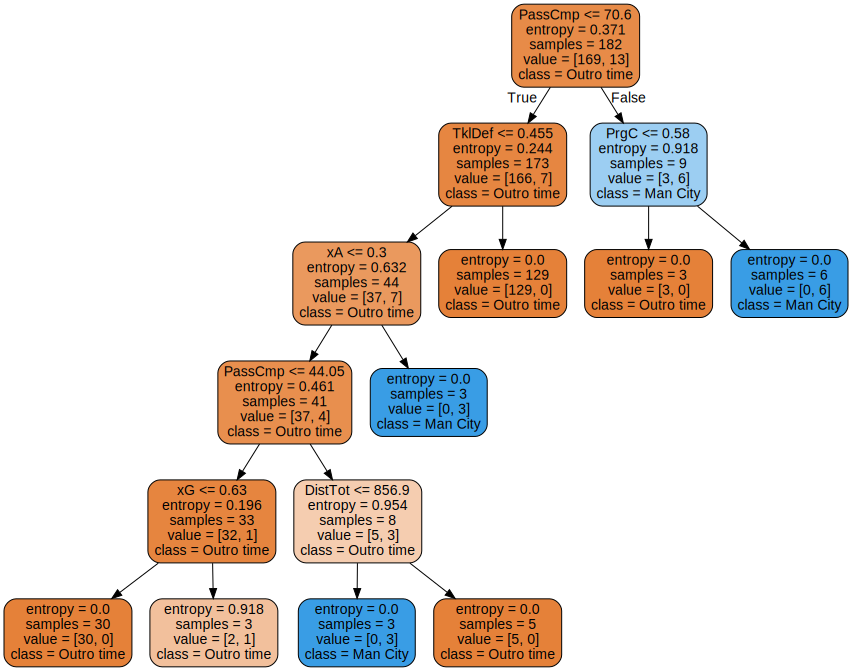

In [ ]:
dot_data = export_graphviz(modelo, out_file = None, feature_names=['xG','xA','PrgC','PrgP','PrgR','TklDef','TklMc','TklAta','Cortes','PassCmp','PassAtt','DistTot','DistPrg'],
                           filled = True, rounded = True, class_names = ["Outro time","Man City"])
graphviz.Source(dot_data)
